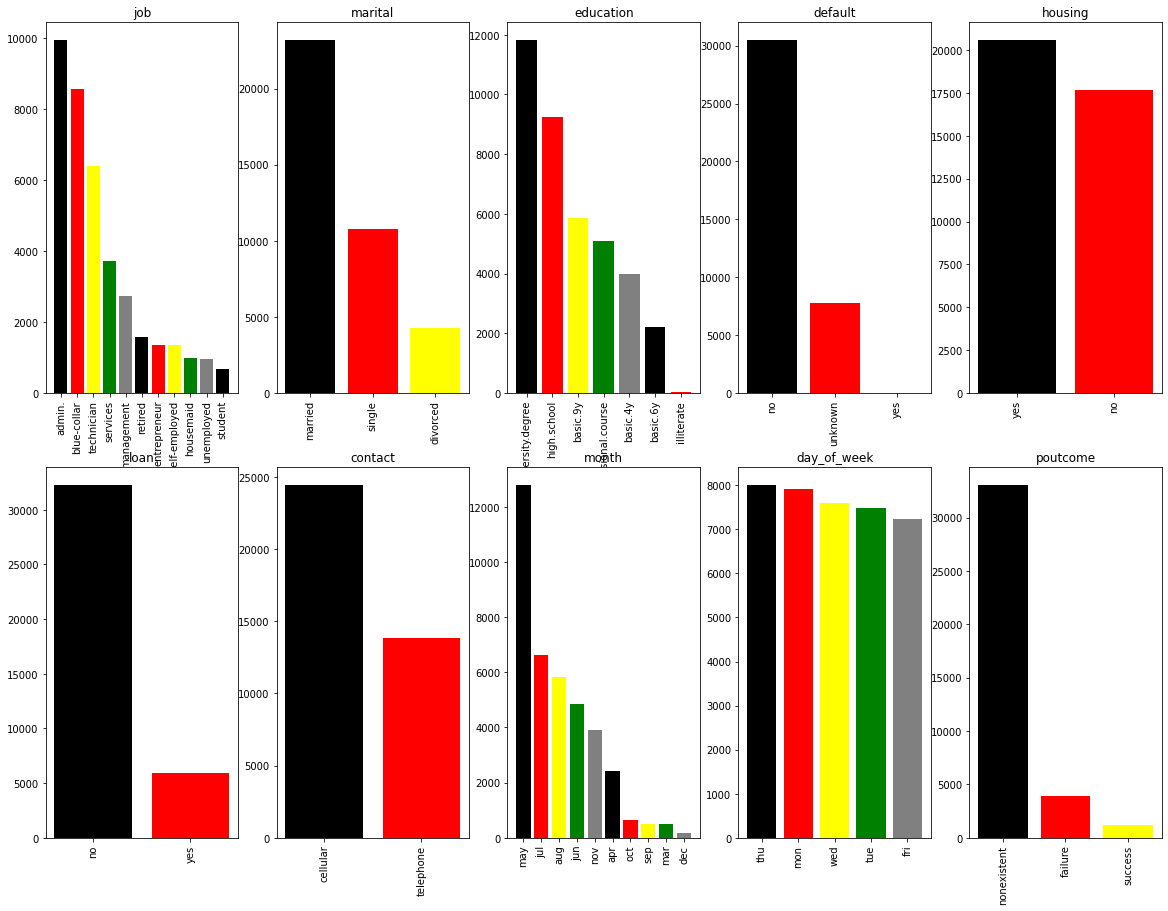

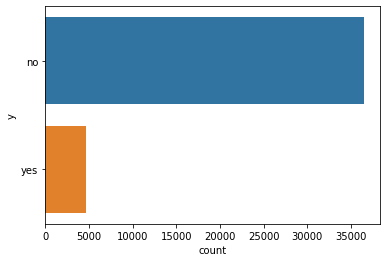

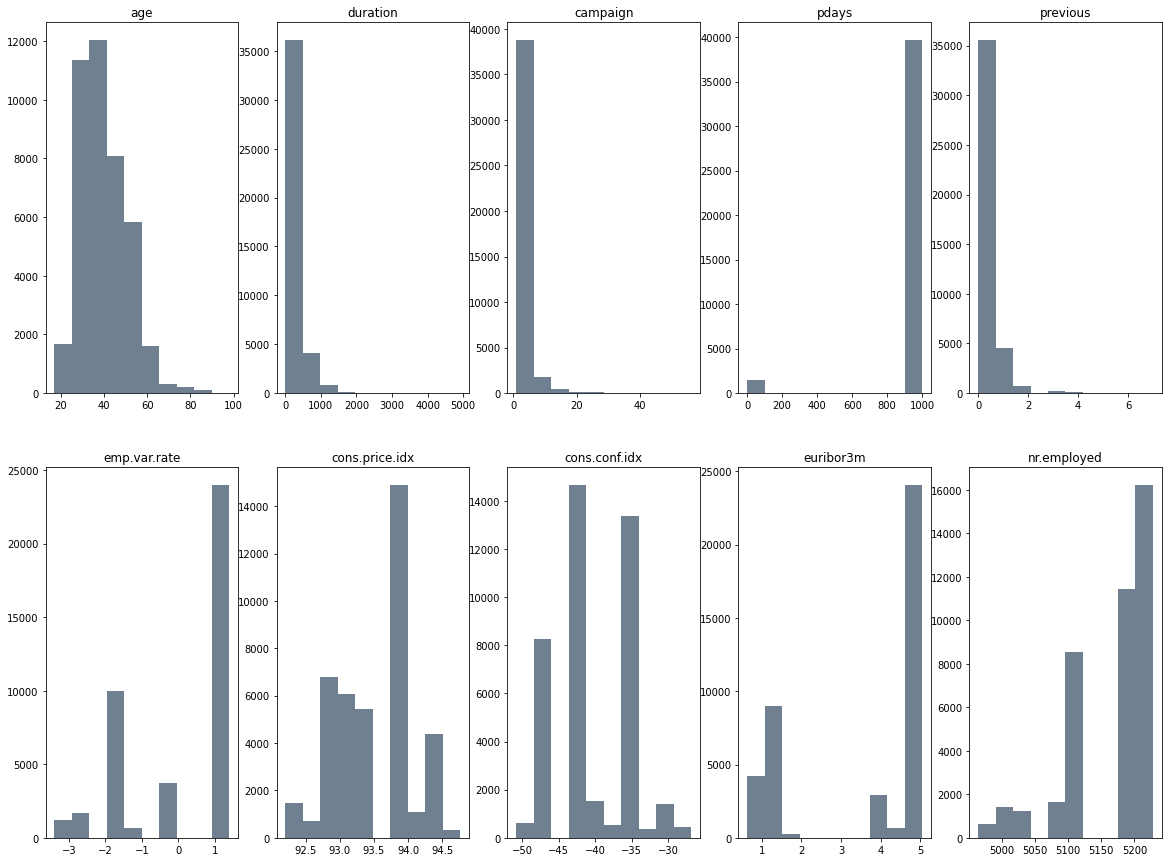

In [149]:
import csv
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest,mutual_info_classif

import seaborn as sns
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split 
from sklearn import metrics
from sklearn.metrics import confusion_matrix,plot_confusion_matrix 
from sklearn.preprocessing import OneHotEncoder,LabelEncoder

types = []
bank_data = pd.read_csv("bank-additional-full.csv",delimiter = ";")
bnk = bank_data
df = pd.DataFrame(bank_data)
# df.info()
colnames  = list(df_new[:0])
# print(colnames)
categorical = df.select_dtypes(['object']).columns
cat = list(categorical)
numeric = df.select_dtypes(exclude=['object']).columns
num = list(numeric)
feat = cat[:-1]

rmover = []
for i in feat:
    if "unknown" in bank_data[i].unique():
        rmover.append(i)
rmover
fresh_dat = bnk.loc[(bnk['education']!='unknown')&(bnk['marital']!='unknown')&(bnk['housing']!='unknown')
                       &(bnk['job']!='unknown')&(bnk['loan']!='unknown')]
fresh_dat
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

fig , axis = plt.subplots(2, 5, sharex=False, sharey=False, figsize=(20, 15))

f= 0

for i in feat:
    value_counts = fresh_dat[i].value_counts()
    put_x = f // 5
    put_y = f % 5
    x_pos = np.arange(0, len(value_counts))
    
    axis[put_x, put_y].bar(x_pos, value_counts.values, tick_label = value_counts.index
                              ,color=['black', 'red', 'yellow', 'green', 'gray'])

    axis[put_x, put_y].set_title(i)
    
    for tick in axis[put_x, put_y].get_xticklabels():
        tick.set_rotation(90)
    
    f += 1

plt.show()
sns.countplot(y = 'y', data = bank_data)
fig , axis = plt.subplots(2, 5, sharex=False, sharey=False, figsize=(20, 15))

f = 0

for i in num:
    
    put_x = f // 5
    put_y = f % 5
    
    axis[put_x, put_y].hist(bnk[i],color = 'slategray')

    axis[put_x, put_y].set_title(i)
    
    
    f += 1

plt.show()

encoder = OneHotEncoder(handle_unknown='ignore')
df.drop(["default"],axis = 1)
fresh_dat.drop(["default"],axis = 1)
df_new = pd.get_dummies(fresh_dat, columns=cat)



In [172]:


df_new

select = SelectKBest(mutual_info_classif,k=6)
z = select.fit_transform(X,y)
print(z)


[[ 2.6100e+02  1.1000e+00  9.3994e+01 -3.6400e+01  4.8570e+00  5.1910e+03]
 [ 1.4900e+02  1.1000e+00  9.3994e+01 -3.6400e+01  4.8570e+00  5.1910e+03]
 [ 2.2600e+02  1.1000e+00  9.3994e+01 -3.6400e+01  4.8570e+00  5.1910e+03]
 ...
 [ 1.8900e+02 -1.1000e+00  9.4767e+01 -5.0800e+01  1.0280e+00  4.9636e+03]
 [ 4.4200e+02 -1.1000e+00  9.4767e+01 -5.0800e+01  1.0280e+00  4.9636e+03]
 [ 2.3900e+02 -1.1000e+00  9.4767e+01 -5.0800e+01  1.0280e+00  4.9636e+03]]


In [169]:
import time
start = time.time()

X = z
y = df_new[colnames[-1]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32)

print(f"No. of training examples: {X_train.shape[0]}")
print(f"No. of testing examples: {X_test.shape[0]}") 

clf = DecisionTreeClassifier(max_depth = 7,max_features = None,max_leaf_nodes  = 16 )
clf = clf.fit(X_train,y_train)
 
 
y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred) * 100)
print("Recall:",metrics.recall_score(y_test, y_pred) * 100)
print("Precision:",metrics.precision_score(y_test, y_pred) * 100)
print("Corresponding Confusion Matrix: ")
print(confusion_matrix(y_test,y_pred))
end = time.time()
print("Total time taken:",(end - start),"seconds")

No. of training examples: 30596
No. of testing examples: 7649
Accuracy: 91.05765459537194
Recall: 55.55555555555556
Precision: 61.53846153846154
Corresponding Confusion Matrix: 
[[6485  300]
 [ 384  480]]
Total time taken: 0.05681753158569336 seconds


In [170]:
import time
start = time.time()
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(X_train, y_train)
#Predict the response for test dataset
y_pred = gnb.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred) * 100)
print("Recall:",metrics.recall_score(y_test, y_pred) * 100)

print("Precision:",metrics.precision_score(y_test, y_pred) * 100)

print(confusion_matrix(y_test,y_pred))
end = time.time()
print("Total time taken:",(end - start),"seconds")







Accuracy: 87.13557327755262
Recall: 71.75925925925925
Precision: 45.588235294117645
[[6045  740]
 [ 244  620]]
Total time taken: 0.03037285804748535 seconds


In [171]:
import time
start = time.time()
from sklearn.ensemble import RandomForestClassifier
import numpy as np
 # create regressor object
 
# fit the regressor with x and y data
clf1 = RandomForestClassifier(n_estimators = 100,max_depth=5, random_state=32)
clf1.fit(X_train, y_train)
y_pred = clf1.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred) * 100)
print("Recall:",metrics.recall_score(y_test, y_pred) * 100)
print("Precision:",metrics.precision_score(y_test, y_pred) * 100)
print("Corresponding Confusion Matrix: ")
print(confusion_matrix(y_test,y_pred))
end = time.time()
print("Total time taken:",(end - start),"seconds")





Accuracy: 91.10994901294288
Recall: 41.43518518518518
Precision: 67.29323308270678
Corresponding Confusion Matrix: 
[[6611  174]
 [ 506  358]]
Total time taken: 1.8976435661315918 seconds


In [148]:
bank_data.columns
for i in list(bnk[:0]):
  print(list(bnk[i].unique()))


[56, 57, 37, 40, 45, 59, 41, 24, 25, 29, 35, 54, 46, 50, 39, 30, 55, 49, 34, 52, 58, 32, 38, 44, 42, 60, 53, 47, 51, 48, 33, 31, 43, 36, 28, 27, 26, 22, 23, 20, 21, 61, 19, 18, 70, 66, 76, 67, 73, 88, 95, 77, 68, 75, 63, 80, 62, 65, 72, 82, 64, 71, 69, 78, 85, 79, 83, 81, 74, 17, 87, 91, 86, 98, 94, 84, 92, 89]
['housemaid', 'services', 'admin.', 'blue-collar', 'technician', 'retired', 'management', 'unemployed', 'self-employed', 'unknown', 'entrepreneur', 'student']
['married', 'single', 'divorced', 'unknown']
['basic.4y', 'high.school', 'basic.6y', 'basic.9y', 'professional.course', 'unknown', 'university.degree', 'illiterate']
['no', 'unknown', 'yes']
['no', 'yes', 'unknown']
['no', 'yes', 'unknown']
['telephone', 'cellular']
['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'mar', 'apr', 'sep']
['mon', 'tue', 'wed', 'thu', 'fri']
[261, 149, 226, 151, 307, 198, 139, 217, 380, 50, 55, 222, 137, 293, 146, 174, 312, 440, 353, 195, 38, 262, 342, 181, 172, 99, 93, 233, 255, 362, 348, 386